<a href="https://colab.research.google.com/github/lucaslopez411-bot/Data-Science-I/blob/Entrega_Final/ProyectoDS_I_EntregaFinal_Lopez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Abstract
## De Reactivo a Proactivo: Un Sistema de Alerta Temprana para la Depresión Estudiantil con Machine Learning. Modelado Predictivo de diagnóstico de depresión estudiantil.

---

#### Contexto:
1. **Introducción: La Crisis Silenciosa**

La vida estudiantil, aunque enriquecedora, genera presiones que han convertido la depresión en un problema crítico entre los estudiantes. Este flagelo silencioso afecta su rendimiento, bienestar y permanencia en el sistema educativo, requiriendo una atención urgente y más eficaz.

2. **Planteamiento del Problema: Detección Tardía**

Los sistemas de apoyo actuales son principalmente reactivos. Dependen de que el estudiante busque ayuda o de que alguien identifique señales evidentes, lo que suele ocurrir cuando el cuadro depresivo ya está avanzado. Este enfoque se ve limitado por la normalización del estrés y el estigma asociado a la salud mental.

3. **Justificación: La Solución en los Datos**

El Machine Learning emerge como una solución al permitir un cambio de paradigma: de reactivo a proactivo. Al analizar factores como el rendimiento académico, hábitos y variables socioeconómicas, podemos desarrollar un modelo predictivo que funcione como un sistema de alerta temprana, identificando a los estudiantes en riesgo de manera objetiva y escalable.

#### Objetivo de Investigación:
El objetivo central de este proyecto consiste en desarrollar y validar un modelo de Machine Learning capaz de identificar con un alto grado de precisión a estudiantes en riesgo de padecer depresión, para lo cual se analizarán factores determinantes. Para alcanzar esta meta, el trabajo se articula en dos objetivos específicos fundamentales: en primer lugar, identificar y recopilar los factores más correlacionados con la depresión estudiantil, y en segundo, determinar las características más influyentes en la predicción, con el fin de dotar al modelo de la transparencia y el valor interpretativo necesarios para que su resultado sea comprensible y accionable.

#### Metodología:
Utilizando un dataset de 27901 registros estudiantiles, implementamos un enfoque analítico multimodal que combina:

Análisis tradicional de variables (Estres Financiero, Rendimiento Académico, Horas de Sueño, entre otros)

Rendimiento comparativo de tres algoritmos de clasificación: Regresión Logística, Random Forest y XGBoost


## Hipótesis Extendidas para Investigación
**Hipótesis 1: "La combinación de presión académica, estrés financiero, horas de trabajo/estudio y presencia de pensamientos suicidas influyen significativamente en el nivel de depresión."**

**Hipótesis 2: "Los estudiantes o profesionales con mejor rendimiento académico (CGPA más alto) presentan niveles más bajos de depresión."**

**Hipótesis 3: Menor duración del sueño está asociada con mayores niveles de depresión.**

#### Conclusión del trabajo a realizar:

En definitiva, este proyecto no busca sustituir la empatía humana ni la labor de los profesionales de la salud mental. Por el contrario, busca potenciarla. Se propone el desarrollo de una 'brújula' tecnológica que nos permita navegar la complejidad de la salud mental estudiantil y dirigir los recursos de apoyo hacia quienes más lo necesitan, en el momento preciso. Al pasar de un modelo reactivo a uno predictivo y proactivo, damos un paso crucial para construir entornos educativos no solo más inteligentes, sino también más humanos y solidarios.

**Estructura del dataset:**

**id:** Identificador único anónimo para cada estudiante.

**Gender:** Género del estudiante.

**Age:** Edad del estudiante.

**City:** Ciudad de residencia.

**Profession:** Ocupación del estudiante.

**Academic Pressure:** Nivel de presión académica percibida.

**Work Pressure:** Nivel de presión laboral (si aplica).

**CGPA:** Promedio académico acumulado.

**Study Satisfaction:** Nivel de satisfacción con los estudios.

**Job Satisfaction:** Nivel de satisfacción laboral (si aplica).

**Sleep Duration:** Horas de sueño promedio por noche.

**Dietary Habits:** Calidad de los hábitos alimenticios.

**Degree:** Nivel o tipo de grado académico en curso.

**Have you ever had suicidal thoughts?:** Indicador de pensamientos suicidas.

**Work/Study Hours:** Total de horas dedicadas a trabajo y estudio.

**Financial Stress:** Nivel de estrés relacionado con las finanzas personales.

**Family History of Mental Illness:** Antecedentes familiares de trastornos mentales.

**Depression:** Variable objetivo. Indica si el estudiante ha sido diagnosticado o muestra signos de depresión.

In [182]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/lucaslopez411-bot/Data-Science-I/refs/heads/Entrega_Final/DS_I_EntregaFinal/Student%20Depression%20Dataset.csv")

df.head()


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [183]:
print("Shape")
df.shape

Shape


(27901, 18)

Podemos observar que nuestro dataset cuenta con 27.901 filas y 18 columnas. Dado que algunas columnas poseen nombres extensos y contienen espacios, se procedió a reemplazar dichos espacios por guiones bajos (_). Además, se modificaron algunos nombres por frases más cortas y claras, con el fin de facilitar su uso y mejorar la comprensión durante el análisis.

In [184]:
df.columns = df.columns.str.replace("Have you ever had suicidal thoughts ?", "suicidal_thoughts")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("(", "").str.replace(")", "")


In [185]:
def analyze_missing_values(df):

    missing_values = df.isna().sum().sort_values(ascending=False)
    missing_values[missing_values > 0]
    percentage_missing_values = (df.isna().sum() / df.shape[0]) * 100
    percentage_missing_values[percentage_missing_values > 0]

    missing_values_df = pd.DataFrame({'Valores_nulos': missing_values, 'Porcentaje_nulos': percentage_missing_values})
    missing_values_df

    missing_df = missing_values_df.sort_values(by="Porcentaje_nulos", ascending=False)


    return missing_df

En esta etapa, se desarrolló una función que permite identificar la cantidad de valores nulos presentes en cada columna y calcular su porcentaje respecto al total de registros. Posteriormente, los resultados se ordenaron de mayor a menor con el objetivo de facilitar la detección de las variables con mayor proporción de datos faltantes. A continuacion, se realiza una función para remover valores duplicados, los cuales no se encuentran presentes en el caso en cuestión.

In [186]:
missing_df = analyze_missing_values(df)
missing_df

,Valores_nulos,Porcentaje_nulos
financial_stress,3,0.010752
academic_pressure,0,0.000000
age,0,0.000000
cgpa,0,0.000000
degree,0,0.000000
city,0,0.000000
depression,0,0.000000
dietary_habits,0,0.000000
family_history_of_mental_illness,0,0.000000
gender,0,0.000000


In [187]:
def remove_duplicates_with_info(df, subset=None, keep='first'):
    print("INFORMACIÓN DE ENTRADA:")
    print(f"   - Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
    print(f"   - Duplicados totales: {df.duplicated(subset=subset).sum()}")

    if subset:
        print(f"   - Verificando duplicados en columnas: {subset}")

    original_rows = df.shape[0]

    df_clean = df.drop_duplicates(subset=subset, keep=keep)

    print("\n INFORMACIÓN DE SALIDA:")
    print(f"   - Dimensiones: {df_clean.shape[0]} filas × {df_clean.shape[1]} columnas")
    print(f"   - Duplicados restantes: {df_clean.duplicated(subset=subset).sum()}")
    print(f"   - Filas eliminadas: {original_rows - df_clean.shape[0]}")
    print(f"   - Reducción: {((original_rows - df_clean.shape[0]) / original_rows * 100):.1f}%")

    return df_clean

In [188]:
def plot_by_dtype_subplots(df, columns=None):
    if columns is None:
        columns = df.columns.tolist()

    numeric_cols = df[columns].select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df[columns].select_dtypes(include=['object', 'category']).columns.tolist()

    print(f"Columnas numéricas: {len(numeric_cols)}")
    print(f"Columnas categóricas: {len(categorical_cols)}")

    if numeric_cols:
        n_numeric = len(numeric_cols)
        n_rows = (n_numeric + 2) // 3
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))

        if n_rows == 1:
            axes = axes.reshape(1, -1)

        fig.suptitle('Distribución de Columnas Numéricas')

        for i, col in enumerate(numeric_cols):
            row = i // 3
            col_ax = i % 3
            ax = axes[row, col_ax]

            df[col].hist(bins=30, ax=ax, color='lightblue', alpha=0.7, edgecolor='black')
            ax.set_title(f'{col}\n(Únicos: {df[col].nunique()})', fontweight='bold')
            ax.set_ylabel('Frecuencia')
            ax.grid(True, alpha=0.3)

        for i in range(len(numeric_cols), n_rows * 3):
            row = i // 3
            col_ax = i % 3
            axes[row, col_ax].set_visible(False)

        plt.tight_layout()
        plt.show()

    if categorical_cols:
        n_categorical = len(categorical_cols)
        n_rows = (n_categorical + 2) // 3
        fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 4))

        if n_rows == 1:
            axes = axes.reshape(1, -3)

        fig.suptitle('Distribución de Columnas Categóricas')

        for i, col in enumerate(categorical_cols):
            row = i // 3
            col_ax = i % 3
            ax = axes[row, col_ax]

            value_counts = df[col].value_counts().head(10)  # Top 10
            bars = ax.bar(range(len(value_counts)), value_counts.values,
                         color=plt.cm.Pastel1(i / len(categorical_cols)), alpha=0.7)

            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels([str(x)[:10] + '...' if len(str(x)) > 10 else str(x)
                              for x in value_counts.index],
                             rotation=45, ha='right', fontsize=8)

            for bar in bars:
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=7)

            ax.set_title(f'{col}\n(Únicos: {df[col].nunique()})', fontweight='bold')
            ax.grid(True, alpha=0.3)

        for i in range(len(categorical_cols), n_rows * 3):
            row = i // 3
            col_ax = i % 3
            axes[row, col_ax].set_visible(False)

        plt.tight_layout()
        plt.show()

In [189]:
df = remove_duplicates_with_info(df)

INFORMACIÓN DE ENTRADA:
   - Dimensiones: 27901 filas × 18 columnas
   - Duplicados totales: 0

 INFORMACIÓN DE SALIDA:
   - Dimensiones: 27901 filas × 18 columnas
   - Duplicados restantes: 0
   - Filas eliminadas: 0
   - Reducción: 0.0%


Al identificar que los valores faltantes se encontraban únicamente en la columna “financial_stress”, se decidió imputarlos utilizando la clase SimpleImputer de Scikit-Learn, asignando un valor constante de 0. Esta decisión se basa en la suposición de que las respuestas ausentes corresponden a casos en los que se optó por no declarar estrés financiero, por lo que el valor 0 representa adecuadamente esta condición.

In [190]:
from sklearn.impute import SimpleImputer

numeric_imputer = SimpleImputer(strategy='constant', fill_value=0)

df['financial_stress'] = numeric_imputer.fit_transform(df[['financial_stress']]).ravel().astype(int)

In [191]:
analyze_missing_values(df)

,Valores_nulos,Porcentaje_nulos
id,0,0.0
gender,0,0.0
age,0,0.0
city,0,0.0
profession,0,0.0
academic_pressure,0,0.0
work_pressure,0,0.0
cgpa,0,0.0
study_satisfaction,0,0.0
job_satisfaction,0,0.0


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                27901 non-null  int64  
 1   gender                            27901 non-null  object 
 2   age                               27901 non-null  float64
 3   city                              27901 non-null  object 
 4   profession                        27901 non-null  object 
 5   academic_pressure                 27901 non-null  float64
 6   work_pressure                     27901 non-null  float64
 7   cgpa                              27901 non-null  float64
 8   study_satisfaction                27901 non-null  float64
 9   job_satisfaction                  27901 non-null  float64
 10  sleep_duration                    27901 non-null  object 
 11  dietary_habits                    27901 non-null  object 
 12  degr

Al revisar la información contenida en el dataset, se identificó una columna de ID, la cual no aporta información relevante para los objetivos del análisis. Por este motivo, se decidió eliminarla con el fin de optimizar el conjunto de datos y evitar incluir variables que no contribuyen al estudio.

In [193]:
df.drop(columns='id', inplace=True)

A través de los siguientes gráficos, es posible visualizar la distribución estadística de las diferentes columnas, así como la frecuencia de sus valores únicos. Este análisis exploratorio inicial permite identificar patrones y características relevantes, sirviendo como base para seleccionar las variables más significativas en función de nuestro objetivo de predicción.

Columnas numéricas: 9
Columnas categóricas: 8


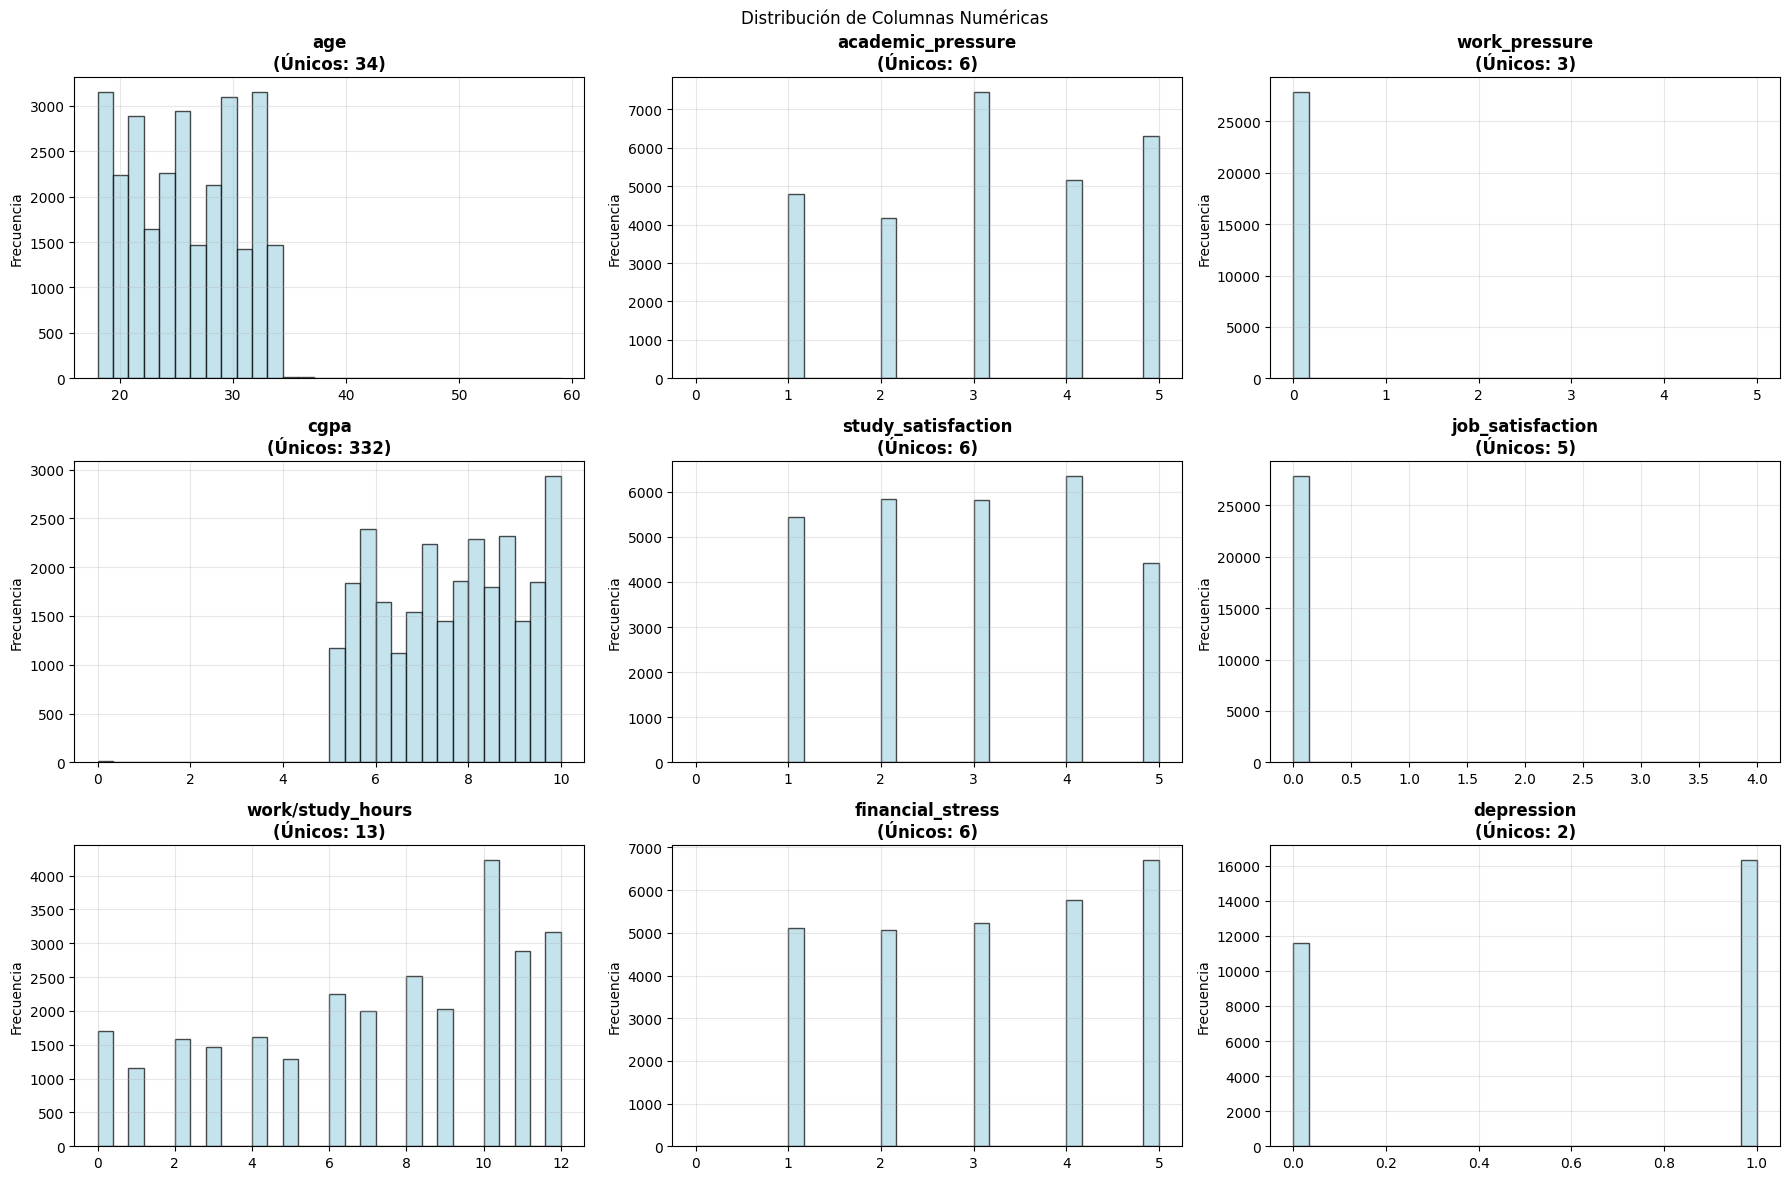

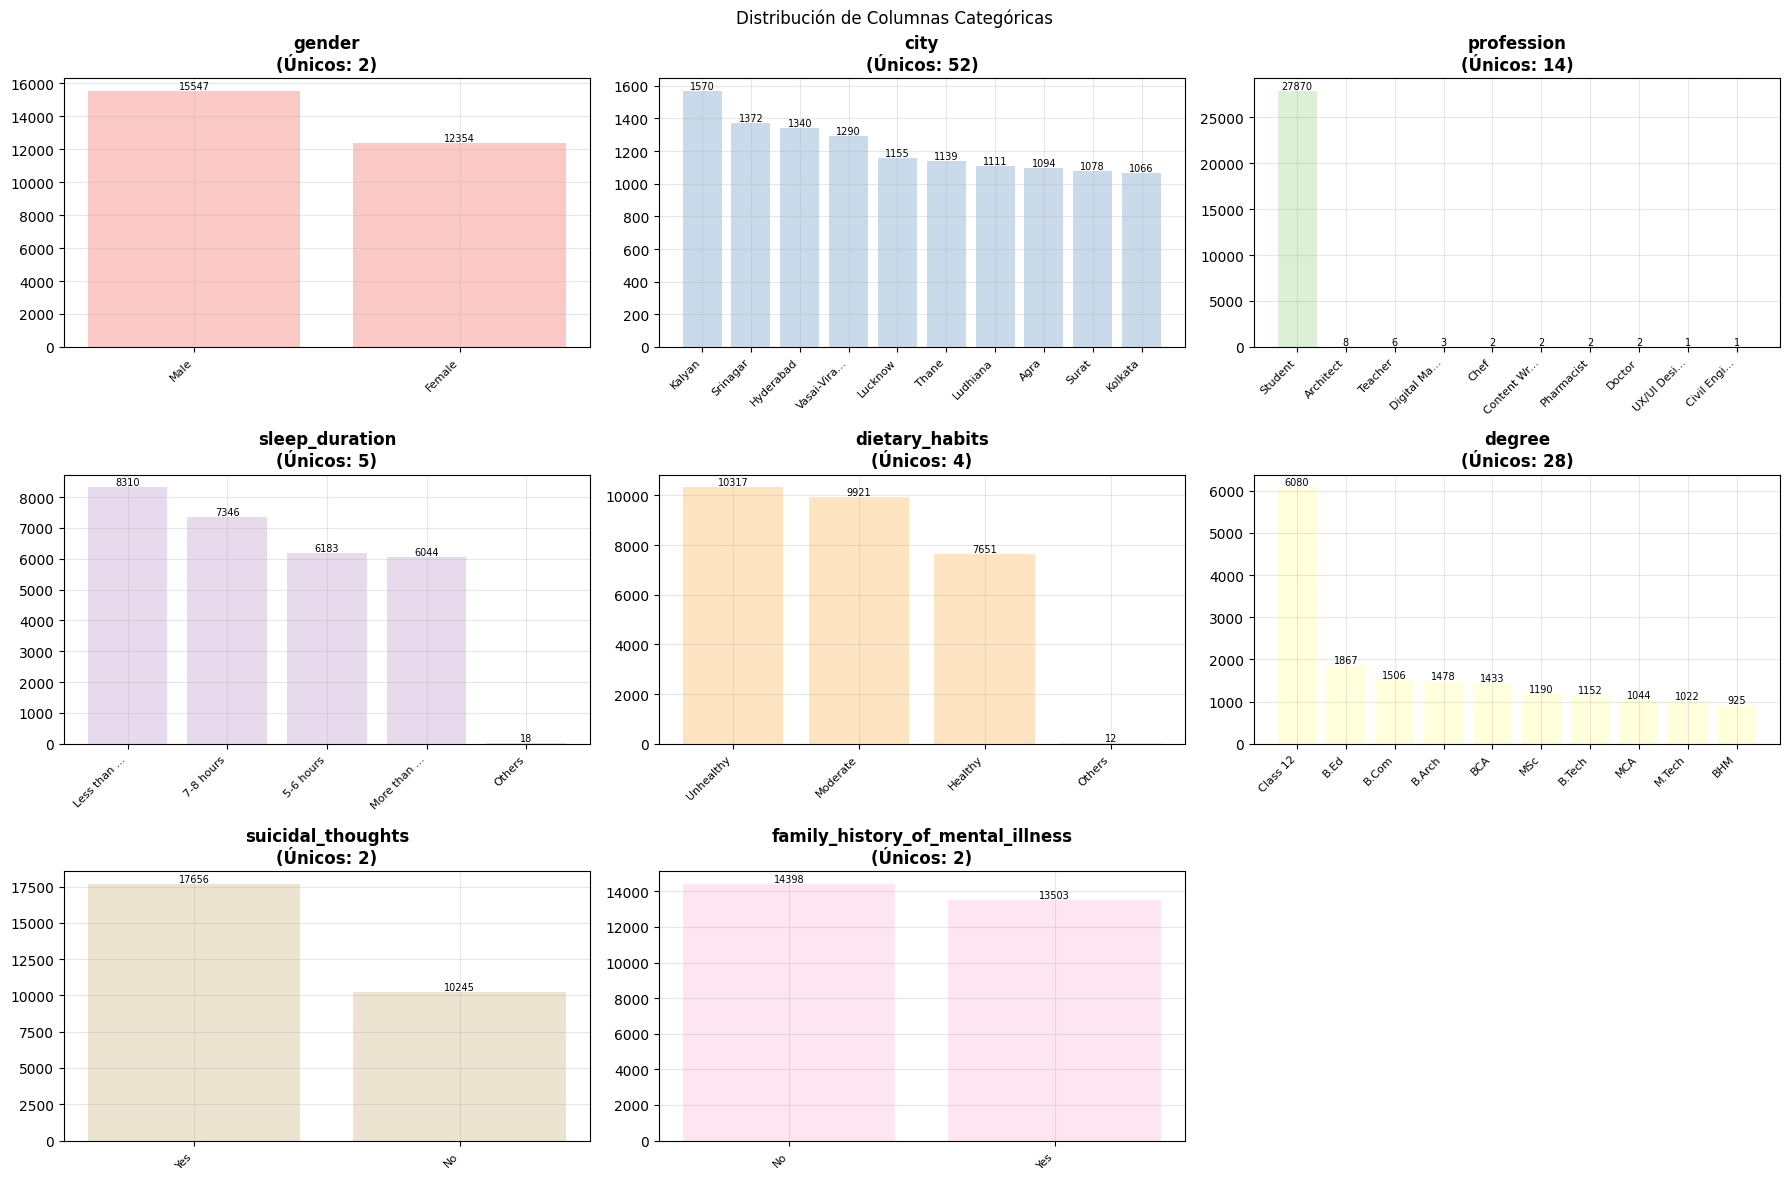

In [194]:
plot_by_dtype_subplots(df, df.columns)

En esta etapa, se llevará a cabo un análisis de datos con el propósito de evaluar las hipótesis inicialmente planteadas. A través de diferentes técnicas estadísticas y visualizaciones, se buscará identificar patrones, relaciones y tendencias que permitan determinar si dichas hipótesis son correctas, parcialmente válidas o requieren ser reformuladas.

Este proceso es fundamental para respaldar las conclusiones del estudio con evidencia empírica y orientar de manera más precisa los pasos siguientes, como la selección de variables relevantes y la construcción de modelos predictivos.

#### Comprobación de las Hipotesis:

##### Hipotesis 1: **"La combinación de presión académica, estrés financiero, horas de trabajo/estudio y presencia de pensamientos suicidas influyen significativamente en el nivel de depresión."**

Para esta etapa, se empleará la herramienta LabelEncoder de Scikit-Learn, la cual permite codificar variables categóricas en valores numéricos. En particular, se aplicará sobre la variable suicidal_thoughts, que actualmente presenta etiquetas de tipo categórico. Esta transformación facilitará su interpretación, además de permitir un análisis más eficiente y estructurado de la información.

Posteriormente, se construyó una matriz de correlación que incluye las variables consideradas en la hipótesis inicial: “depression”, “suicidal_thoughts”, “academic_pressure”, “financial_stress” y “work/study_hours”.

El objetivo de este análisis es evaluar la relación existente entre estas variables, permitiendo identificar cuáles de ellas presentan una mayor asociación con la variable “depression”. Esta información resulta clave para determinar el peso y la relevancia de cada factor en la explicación de los niveles de depresión, además de servir como base para la posterior construcción de modelos predictivos.

In [195]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

cols_to_encode = ['suicidal_thoughts']

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

print(df[cols_to_encode].dtypes)


suicidal_thoughts    int64
dtype: object


In [196]:
columns_corr =[col.lower().replace(" ", "_").replace("(", "").replace(")", "") for col in
['depression', 'suicidal_thoughts', 'academic_pressure', 'financial_stress', 'work/study_hours']]

columns_corr

['depression',
 'suicidal_thoughts',
 'academic_pressure',
 'financial_stress',
 'work/study_hours']

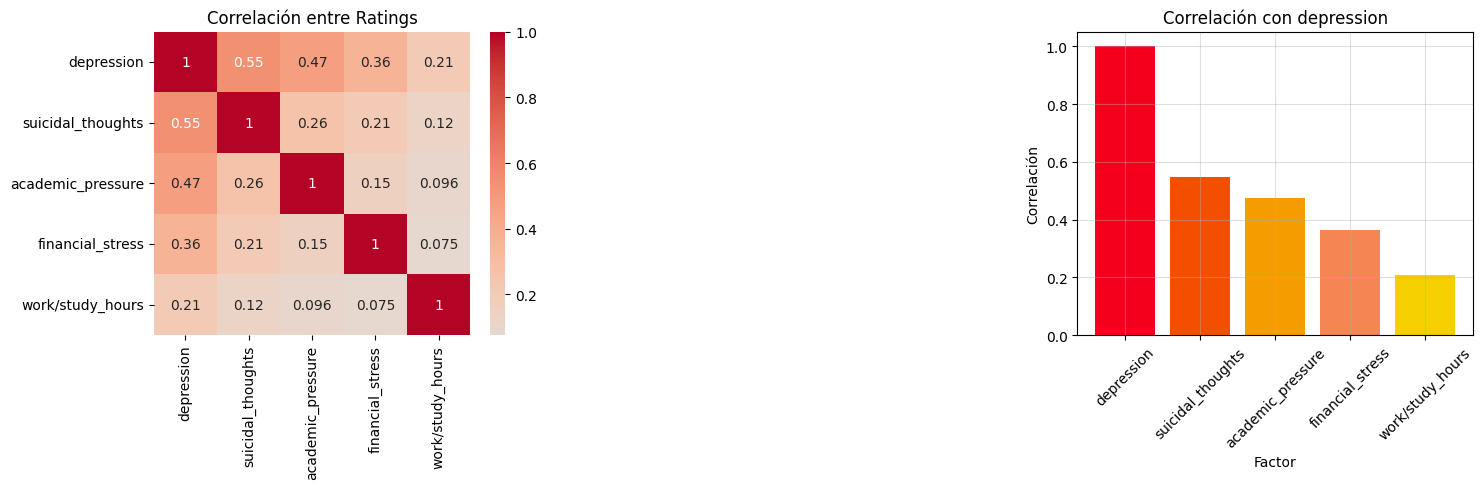

ANÁLISIS HIPÓTESIS 1
Correlación suicidal_thoughts - depression: 0.546
Correlación academic_pressure - depression: 0.475
Correlación financial_stress - depression: 0.364
Correlación work/study_hours - depression: 0.209
Valor p para correlación suicidal_thoughts: 0.000e+00


In [197]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
correlation_matrix = df[columns_corr].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre Ratings')

plt.subplot(1, 3, 3)
factors = columns_corr
correlations_with_overall = [correlation_matrix.loc['depression', factor] for factor in factors]

plt.bar(factors, correlations_with_overall, color=['#F5001C', '#F44F00', '#F59D00', '#F58552','#F5CF00'])
plt.grid(True, alpha=0.4)
plt.xlabel('Factor')
plt.ylabel('Correlación')
plt.title('Correlación con depression')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("ANÁLISIS HIPÓTESIS 1")
print(f"Correlación suicidal_thoughts - depression: {correlation_matrix.loc['depression', 'suicidal_thoughts']:.3f}")
print(f"Correlación academic_pressure - depression: {correlation_matrix.loc['depression', 'academic_pressure']:.3f}")
print(f"Correlación financial_stress - depression: {correlation_matrix.loc['depression', 'financial_stress']:.3f}")
print(f"Correlación work/study_hours - depression: {correlation_matrix.loc['depression', 'work/study_hours']:.3f}")

from scipy.stats import pearsonr
corr_val, p_val = pearsonr(df['suicidal_thoughts'].dropna(),
                          df['depression'].dropna())
print(f"Valor p para correlación suicidal_thoughts: {p_val:.3e}")

El análisis realizado revela que las variables seleccionadas en la hipótesis presentan un grado de correlación consistente con la variable “depression”. Esto respalda la hipótesis inicial, indicando que la combinación de factores analizados influye de manera directa en los niveles de depresión en estudiantes.

Estos resultados permiten sustentar con evidencia estadística la relación entre los factores considerados y la presencia de síntomas depresivos, lo que a su vez refuerza la validez del enfoque planteado para el análisis predictivo posterior.

##### Hipotesis 2: **Los estudiantes con mejor rendimiento académico (CGPA más alto) presentan niveles más altos de depresión.**

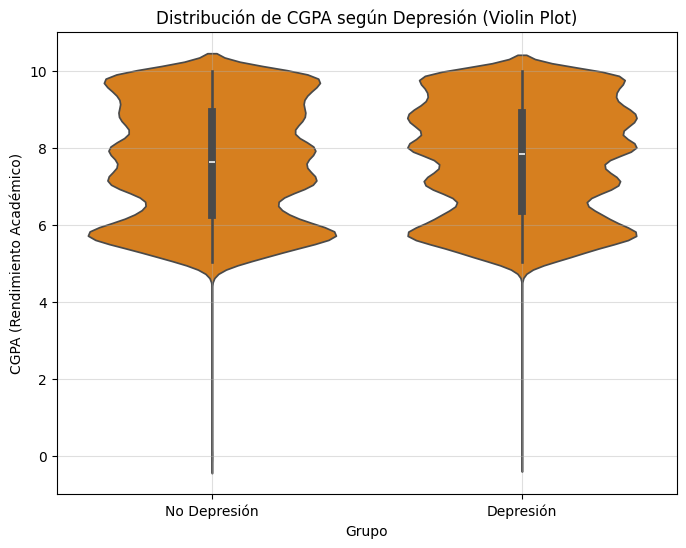

In [198]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='depression', y='cgpa', inner='box', color= '#F58100')
plt.xticks([0, 1], ['No Depresión', 'Depresión'])
plt.xlabel('Grupo')
plt.ylabel('CGPA (Rendimiento Académico)')
plt.grid(True, alpha=0.4)
plt.title('Distribución de CGPA según Depresión (Violin Plot)')
plt.show()

In [199]:
from scipy.stats import mannwhitneyu

cgpa_no_dep = df[df['depression'] == 0]['cgpa']
cgpa_dep = df[df['depression'] == 1]['cgpa']

stat, p_val = mannwhitneyu(cgpa_no_dep, cgpa_dep, alternative='two-sided')

print(f'Estadístico U: {stat:.2f}')
print(f'Valor p: {p_val:.4f}')

alpha = 0.05
if p_val < alpha:
    print("✅ Hay diferencia significativa entre los grupos.")
else:
    print("❌ No se encontró diferencia significativa entre los grupos.")

Estadístico U: 92051294.50
Valor p: 0.0003
✅ Hay diferencia significativa entre los grupos.


Los resultados obtenidos muestran que la hipótesis planteada es correcta, evidenciando una relación ligeramente positiva entre el rendimiento académico (CGPA) y los niveles de depresión. Además, esta relación es estadísticamente significativa, ya que el valor p obtenido es menor al nivel de significancia (α) del 5%.

Este hallazgo sugiere que un mayor rendimiento académico podría estar asociado a mayores niveles de presión y exigencia, lo cual se traduce en un incremento en los síntomas depresivos en algunos estudiantes.

##### Hipotesis 3: **Menor duración del sueño está asociada con mayores niveles de depresión.**

Para abordar esta hipótesis, en primer lugar se procedió a mapear la variable relevante “sleep_duration”, con el fin de transformarla y facilitar su uso en el análisis gráfico.

In [200]:
sleep_map = {
    'Less than 5 hours': 0,
    '5-6 hours': 1,
    '7-8 hours': 2,
    'More than 8 hours': 3,
    'Others':4}

df['sleep_duration_encoded'] = df['sleep_duration'].map(sleep_map)

print(df[['sleep_duration', 'sleep_duration_encoded']].head(20))

       sleep_duration  sleep_duration_encoded
0           5-6 hours                       1
1           5-6 hours                       1
2   Less than 5 hours                       0
3           7-8 hours                       2
4           5-6 hours                       1
5   Less than 5 hours                       0
6           7-8 hours                       2
7   Less than 5 hours                       0
8           7-8 hours                       2
9   Less than 5 hours                       0
10          5-6 hours                       1
11  Less than 5 hours                       0
12  Less than 5 hours                       0
13  Less than 5 hours                       0
14  Less than 5 hours                       0
15  More than 8 hours                       3
16  Less than 5 hours                       0
17          5-6 hours                       1
18          7-8 hours                       2
19          5-6 hours                       1


In [201]:
df['sleep_duration'] = df['sleep_duration_encoded']

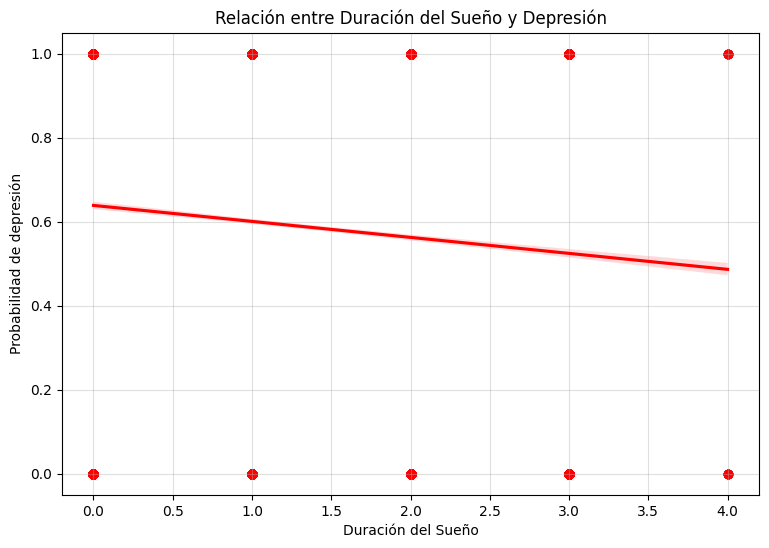

In [202]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='sleep_duration', y='depression', alpha=0.4)
sns.regplot(data=df, x='sleep_duration', y='depression', color='red')

plt.title('Relación entre Duración del Sueño y Depresión')
plt.xlabel('Duración del Sueño')
plt.ylabel('Probabilidad de depresión')
plt.grid(True, alpha=0.4)
plt.show()

En el gráfico se puede observar que la tercera hipótesis planteada es correcta, evidenciándose una relación lineal inversa entre la duración del sueño y la depresión. Es decir, a medida que aumentan las horas de sueño, disminuye la probabilidad de que un individuo sea categorizado con depresión.

## 📌 FEATURES PARA MODELO DE ML

In [203]:
nric_features = df.select_dtypes(include=[np.number]).columns.tolist()
nric_features = [col for col in nric_features if col != 'depression']

correlations = df[nric_features + ['depression']].corr()['depression'].sort_values(ascending=False)
print("📊 Correlación de Pearson con 'depression':")
print(correlations)

selected_features = correlations.head(5).index.tolist()

if 'depression' in selected_features:
    selected_features.remove('depression')

print("\n✅ Variables seleccionadas por correlación de Pearson:")
print(selected_features)

X = df[selected_features]
y = df['depression']

📊 Correlación de Pearson con 'depression':
depression                1.000000
suicidal_thoughts         0.546277
academic_pressure         0.474835
financial_stress          0.363595
work/study_hours          0.208563
cgpa                      0.022210
work_pressure            -0.003351
job_satisfaction         -0.003482
sleep_duration_encoded   -0.087164
sleep_duration           -0.087164
study_satisfaction       -0.167971
age                      -0.226422
Name: depression, dtype: float64

✅ Variables seleccionadas por correlación de Pearson:
['suicidal_thoughts', 'academic_pressure', 'financial_stress', 'work/study_hours']


A través del método de selección de características basado en Correlación de Pearson, evaluamos la relación entre las variables numéricas y la variable objetivo (depression). Este método nos permite identificar y seleccionar aquellas variables numéricas que presentan una mayor asociación lineal con la variable objetivo, priorizando las que potencialmente aportan mayor capacidad predictiva al modelo.

Como resultado de este análisis, se seleccionaron las siguientes variables numéricas relevantes:

#### FEATURES PRINCIPALES
1. **suicidal_thoughts:**
Correlación: +0.546 (FUERTE)
Impacto: CRÍTICO - Explica el 54,6% de la variabilidad en los casos de interés
Recomendación: INCLUIR COMO FEATURE PRINCIPAL
2. **academic_pressure:**
Correlación: +0.475 (MODERADA)
Impacto: ALTO-MODERADO - La presión puede elevar el estres, lo que puede conllevar en sentimientos depresivos.
Recomendación: INCLUIR COMO FEATURE ESENCIAL
3. **financial_stress**
Correlación: +0.364 (MODERADA DEBIL)
Impacto: MEDIO - No poder sobrellevar una buena situación financiera afecta los sentimientos y puede derivar en problemas como la depresión.
Recomendación: INCLUIR COMO FEATURE SECUNDARIO
---
#### FEATURES OPCIONALES
4. **work/study_hours**
Correlación: +0.209 (MODERADA DEBIL)
Impacto: BAJO - Comodidad física importante
Recomendación: INCLUIR COMO FEATURE SECUNDARIO
---
## 🪄 MODELO DE MACHINE LEARNING PARA PREDICCIÓN DE DEPRESIÓN

In [204]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           roc_auc_score, roc_curve)

Luego de seleccionar las características más relevantes para mejorar la exactitud de nuestros modelos de predicción que hemos preseleccionado anteriormente (Logistic Regression, Random Forest, XGBoost), diferenciando un 80% de datos para entrenamiento y 20% para testeo.

In [205]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Dataset: {X.shape[0]} muestras, {X.shape[1]} features")
print(f"Distribución target: {y.value_counts().to_dict()}")
print(f"Train: {X_train.shape[0]} muestras")
print(f"Test: {X_test.shape[0]} muestras")

Dataset: 27901 muestras, 4 features
Distribución target: {1: 16336, 0: 11565}
Train: 22320 muestras
Test: 5581 muestras


In [206]:
models = {'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
          'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
          'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss')}

In [207]:
print("ENTRENANDO Y EVALUANDO MODELOS")

results = {}
predictions = {}
y_pred_proba_dict = {}

for name, model in models.items():
    print(f"\n Entrenando {name}...")

    if name in ['Logistic Regression', 'XGBoost']:
        print(f"Generando data scaled para : {name}")
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        print(f"Generando data para : {name}")
        X_tr, X_te = X_train, X_test

    model.fit(X_tr, y_train)

    y_pred = model.predict(X_te)
    y_pred_proba = model.predict_proba(X_te)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    cv_scores = cross_val_score(model, X_tr, y_train, cv=5, scoring='accuracy')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc,
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std()
    }

    predictions[name] = y_pred
    y_pred_proba_dict[name] = y_pred_proba

    print(f"{name} completado - Accuracy: {accuracy:.3f}")

    print(" RESULTADOS COMPARATIVOS ")

results_df = pd.DataFrame(results).T
results_df = results_df.round(4)
results_df_sorted = results_df.sort_values('Accuracy', ascending=False)

ENTRENANDO Y EVALUANDO MODELOS

 Entrenando Logistic Regression...
Generando data scaled para : Logistic Regression
Logistic Regression completado - Accuracy: 0.826
 RESULTADOS COMPARATIVOS 

 Entrenando Random Forest...
Generando data para : Random Forest
Random Forest completado - Accuracy: 0.823
 RESULTADOS COMPARATIVOS 

 Entrenando XGBoost...
Generando data scaled para : XGBoost
XGBoost completado - Accuracy: 0.823
 RESULTADOS COMPARATIVOS 


In [208]:
results_df_sorted

,Accuracy,Precision,Recall,F1-Score,AUC,CV Mean,CV Std
Logistic Regression,0.8260,0.8389,0.8700,0.8541,0.9006,0.8310,0.0072
XGBoost,0.8230,0.8375,0.8657,0.8513,0.8962,0.8243,0.0063
Random Forest,0.8226,0.8396,0.8617,0.8505,0.8938,0.8235,0.0066


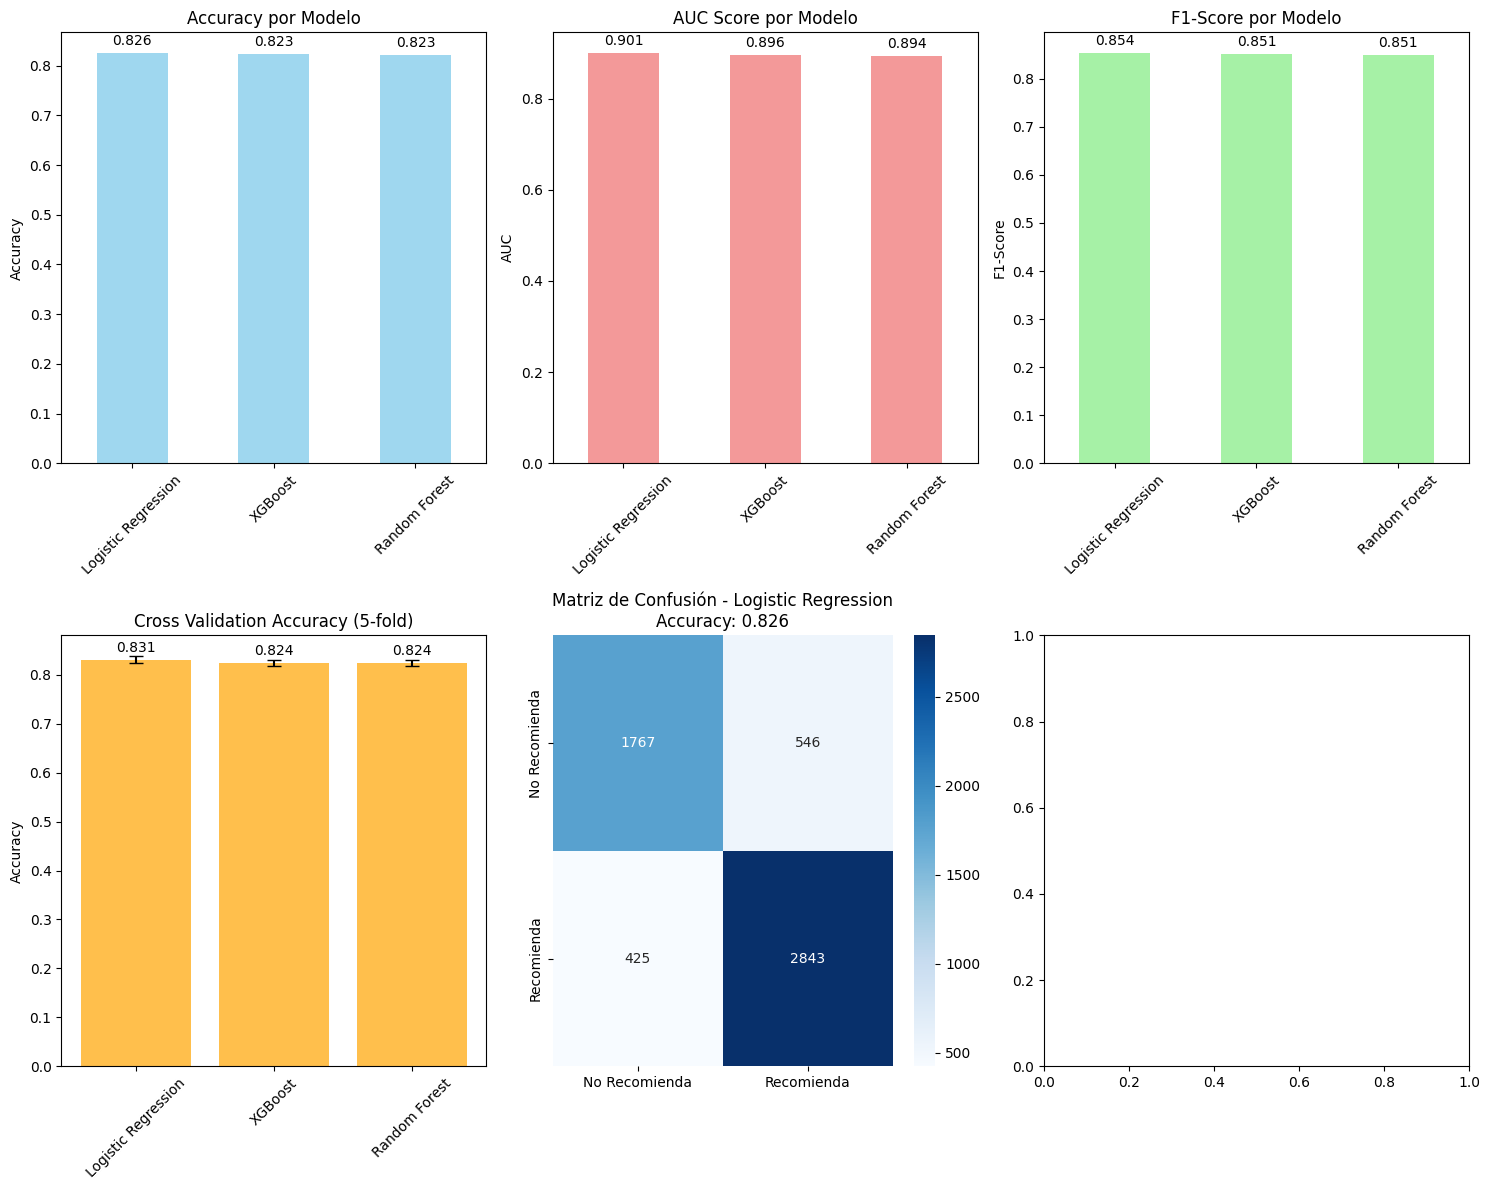

In [209]:

fig, axes = plt.subplots(2, 3, figsize=(15, 12))

# Gráfico 1: Accuracy
results_df_sorted['Accuracy'].plot(kind='bar', ax=axes[0,0], color='skyblue', alpha=0.8)
axes[0,0].set_title('Accuracy por Modelo')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df_sorted['Accuracy']):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Gráfico 2: AUC
results_df_sorted['AUC'].plot(kind='bar', ax=axes[0,1], color='lightcoral', alpha=0.8)
axes[0,1].set_title('AUC Score por Modelo')
axes[0,1].set_ylabel('AUC')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df_sorted['AUC']):
    axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Gráfico 3: F1-Score
results_df_sorted['F1-Score'].plot(kind='bar', ax=axes[0,2], color='lightgreen', alpha=0.8)
axes[0,2].set_title('F1-Score por Modelo')
axes[0,2].set_ylabel('F1-Score')
axes[0,2].tick_params(axis='x', rotation=45)
for i, v in enumerate(results_df_sorted['F1-Score']):
    axes[0,2].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Gráfico 4: Cross Validation
cv_means = results_df_sorted['CV Mean']
cv_stds = results_df_sorted['CV Std']
axes[1,0].bar(cv_means.index, cv_means.values, yerr=cv_stds.values,
             capsize=5, alpha=0.7, color='orange')
axes[1,0].set_title('Cross Validation Accuracy (5-fold)')
axes[1,0].set_ylabel('Accuracy')
axes[1,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(cv_means.values):
    axes[1,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Gráfico 5: Matriz de confusión del mejor modelo
best_model_name = results_df['Accuracy'].idxmax()
best_y_pred = predictions[best_model_name]
cm = confusion_matrix(y_test, best_y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1,1],
            xticklabels=['No Recomienda', 'Recomienda'],
            yticklabels=['No Recomienda', 'Recomienda'])
axes[1,1].set_title(f'Matriz de Confusión - {best_model_name}\nAccuracy: {results_df.loc[best_model_name, "Accuracy"]:.3f}')


plt.tight_layout()
plt.show()

CURVAS ROC - TODOS LOS MODELOS


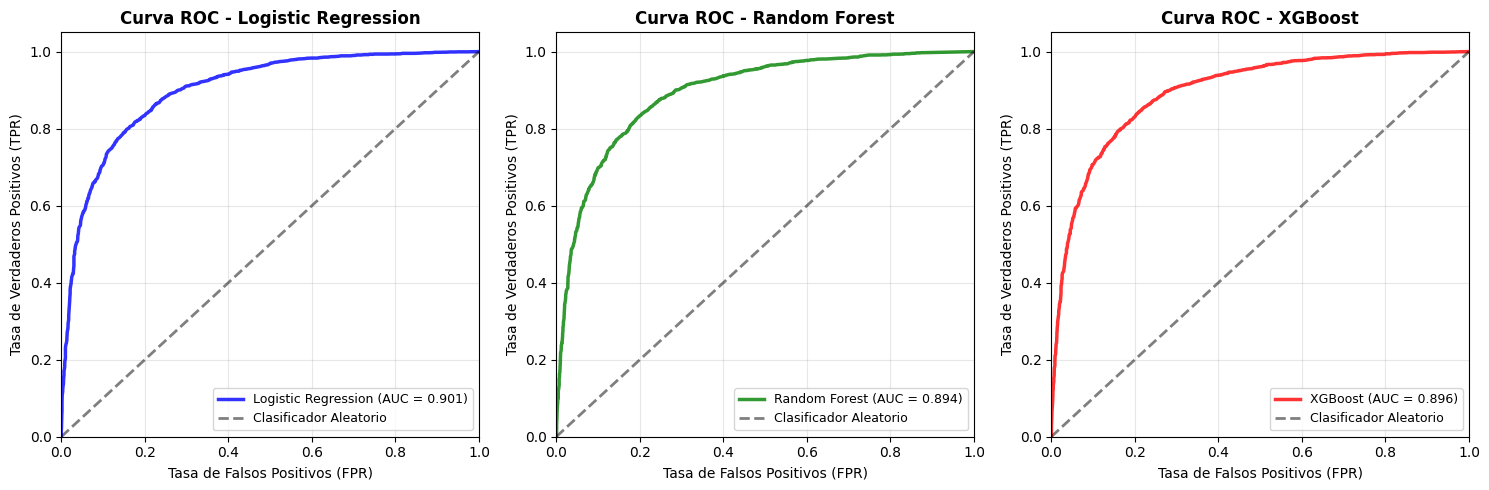

In [210]:
print("CURVAS ROC - TODOS LOS MODELOS")

n_models = len(models)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']

for i, (name, color) in enumerate(zip(models.keys(), colors)):
    if i < len(axes):

        fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dict[name])
        auc_score = roc_auc_score(y_test, y_pred_proba_dict[name])

        axes[i].plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})',
                    linewidth=2.5, color=color, alpha=0.8)
        axes[i].plot([0, 1], [0, 1], 'k--', alpha=0.5,
                    label='Clasificador Aleatorio', linewidth=2)

        axes[i].set_xlabel('Tasa de Falsos Positivos (FPR)', fontsize=10)
        axes[i].set_ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=10)
        axes[i].set_title(f'Curva ROC - {name}', fontsize=12, fontweight='bold')
        axes[i].legend(fontsize=9)
        axes[i].grid(alpha=0.3)
        axes[i].set_xlim([0.0, 1.0])
        axes[i].set_ylim([0.0, 1.05])

for i in range(len(models), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

📈 A partir de los datos analizados previamente, podemos observar que los modelos presentan resultados coherentes entre sí. La exactitud (accuracy) se sitúa entre el 82% y 83%, mientras que el rendimiento medido por el AUC oscila entre el 89% y 90%, dependiendo del modelo utilizado.

Estos valores evidencian que los tres modelos cuentan con una capacidad predictiva significativamente superior al azar y mantienen una baja tasa de falsos positivos, lo que los hace adecuados para el problema planteado.

IMPORTANCIA DE FEATURES - COMPARATIVO


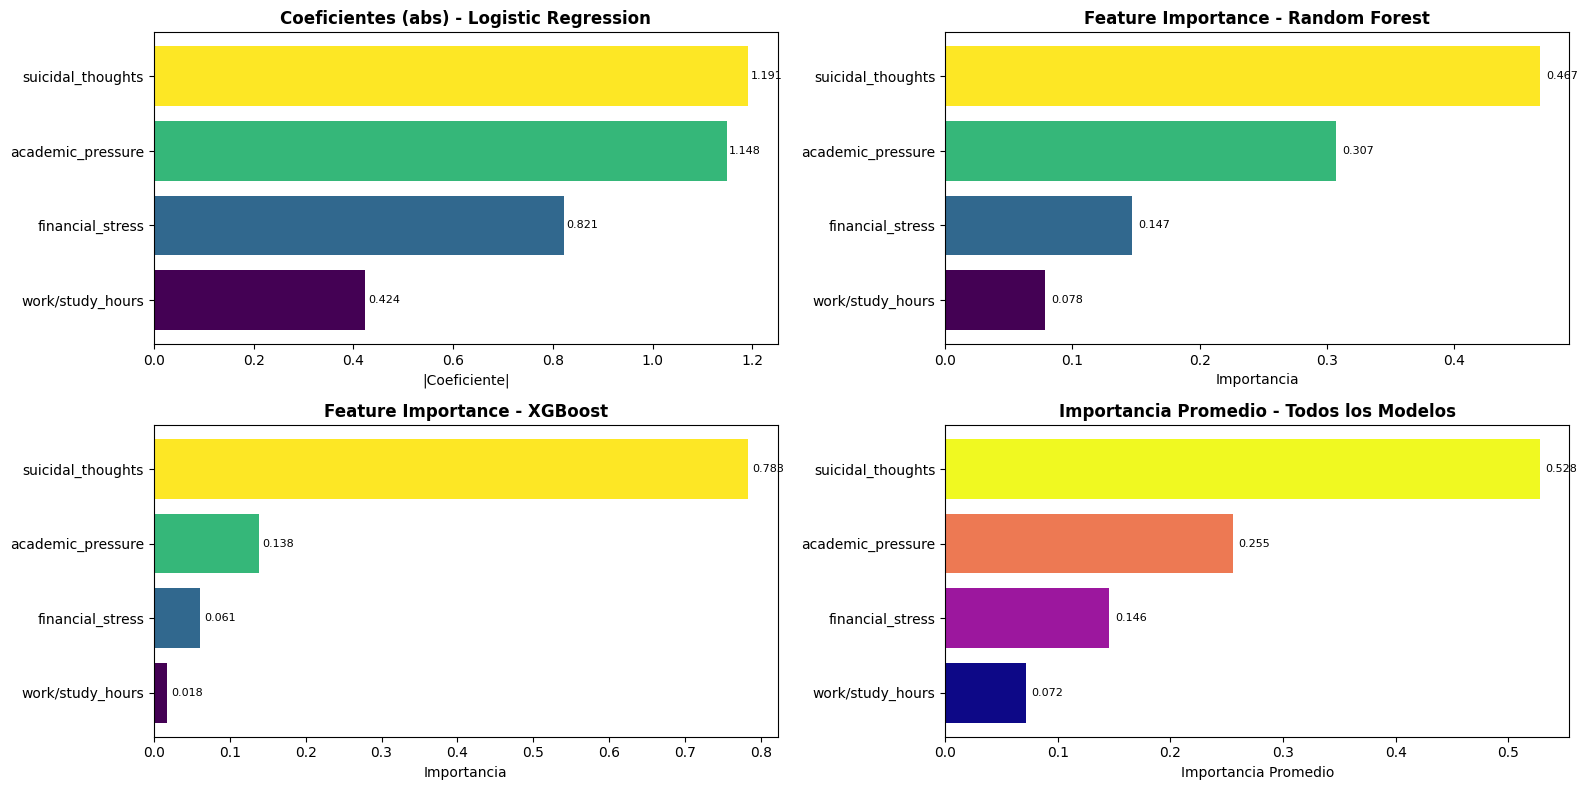

In [211]:
print("IMPORTANCIA DE FEATURES - COMPARATIVO")

fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes = axes.flatten()

all_models = ['Logistic Regression', 'Random Forest', 'XGBoost']

for i, model_name in enumerate(all_models):
    model = models[model_name]

    if hasattr(model, 'feature_importances_'):
        feature_importance = pd.DataFrame({
            'feature': best_features,
            'importance': model.feature_importances_
        }).sort_values('importance', ascending=True)

        title = f'Feature Importance - {model_name}'
        xlabel = 'Importancia'

    elif hasattr(model, 'coef_'):
        importance_values = np.abs(model.coef_[0])
        feature_importance = pd.DataFrame({
            'feature': best_features,
            'importance': importance_values
        }).sort_values('importance', ascending=True)

        title = f'Coeficientes (abs) - {model_name}'
        xlabel = '|Coeficiente|'

    ax = axes[i]
    bars = ax.barh(feature_importance['feature'], feature_importance['importance'],
                   color=plt.cm.viridis(np.linspace(0, 1, len(best_features))))
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(xlabel)

    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.005, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center', fontsize=8)

avg_importance = pd.DataFrame({'feature': best_features})

for model_name in all_models:
    model = models[model_name]

    if hasattr(model, 'feature_importances_'):
        avg_importance[model_name] = model.feature_importances_
    elif hasattr(model, 'coef_'):
        coef_abs = np.abs(model.coef_[0])
        coef_normalized = coef_abs / coef_abs.sum()
        avg_importance[model_name] = coef_normalized

avg_importance['Average'] = avg_importance[all_models].mean(axis=1)
avg_importance = avg_importance.sort_values('Average', ascending=True)

ax_avg = axes[3]
bars_avg = ax_avg.barh(avg_importance['feature'], avg_importance['Average'],
                       color=plt.cm.plasma(np.linspace(0, 1, len(best_features))))
ax_avg.set_title('Importancia Promedio - Todos los Modelos', fontweight='bold')
ax_avg.set_xlabel('Importancia Promedio')

for bar in bars_avg:
    width = bar.get_width()
    ax_avg.text(width + 0.005, bar.get_y() + bar.get_height()/2,
                f'{width:.3f}', ha='left', va='center', fontsize=8)

plt.tight_layout()
plt.show()

## ⭐ Conclusiones finales:

Mejor Opción: **Logistic Regression**

Razones principales:

**Mayor poder discriminativo:**
Logistic Regression presenta el AUC más alto (0.901) en la Curva ROC, superando ligeramente a Random Forest (0.894) y XGBoost (0.896). Esto indica una mejor capacidad para distinguir entre clases positivas y negativas.

**Consistencia en características clave:**
Las variables suicidal_thoughts y academic_pressure se destacan como las más importantes de forma consistente en todos los modelos. Logistic Regression asigna coeficientes absolutos más altos y mejor distribuidos, mostrando una separación más clara entre las características principales y las secundarias.

**Estabilidad e interpretabilidad:**
Logistic Regression ofrece importancias más equilibradas y fácilmente interpretables. En Random Forest y XGBoost, la variable suicidal_thoughts domina de forma muy marcada, mientras que el resto queda con pesos mucho menores, lo que podría reducir la capacidad de explicar el aporte relativo de otras variables.

---

###📊 **Ranking de Modelos:**

🥇1. **Logistic Regression:** Mejor equilibrio entre rendimiento predictivo (AUC) y claridad en la relevancia de variables.

🥈2. **XGBoost:** Buen AUC, pero con alta concentración de importancia en una sola variable.

🥉3. **Random Forest:** Buen rendimiento general, aunque con menor discriminación entre variables clave.

###🌟 Características Más Importantes (Consistentes en todos los modelos):

**suicidal_thoughts:** Principal predictor en los tres modelos.

**academic_pressure:** Segunda variable más relevante de forma estable.

**financial_stress:** Importancia intermedia y consistente.

**work/study_hours:** Importancia menor pero no despreciable.

###✅ Recomendación Final

#### **Logistic Regression es la mejor opción** para este caso porque:



*   Proporciona el mayor poder discriminativo (AUC más alto).
*   Muestra un patrón de importancia claro y consistente.
*   Es fácilmente interpretable, lo que facilita la comunicación de resultados y la toma de decisiones basadas en evidencia.






